# Linear Regression with Tensorflow 2.0
Builds a linear regression with TensorFlow (code)

### Code Overview:
1. Import libraries
2. Generate data for training and testing 
3. Define Model
4. Define Loss function
5. Define Training procedure
6. Run Model code 
    a. Train model
    b. Test model
7. Plot accuracy of results

## Regression Example

Import libraries

In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Let's create a basic dataset

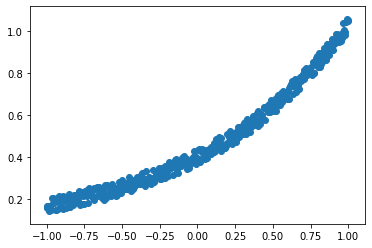

In [6]:
# Create dataset
N = 400
data = lambda: None
data.x = np.linspace(-1, 1, N)
data.y = (10 * np.exp(data.x) + 2 * np.random.rand(N)) / (10 * math.exp(1))
plt.scatter(data.x, data.y)

Set training parameter's and network paramters:

In [7]:
# Training Parameters
learning_rate = 0.001
num_epochs = 100
display_step = 10

Create a linear regression model

In [8]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(0.0, dtype=tf.float64) # Weights for layer
        self.b = tf.Variable(0.0, dtype=tf.float64) # Bias for layer

    def __call__(self, x):
        return self.W * x + self.b


Define Loss Function

In [9]:
@tf.function
def loss(y, y_target):
    return tf.reduce_mean(tf.square(y - y_target))

Define Training Model

In [10]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Train model and test model accuracy

In [11]:
model = Model()

# Train model and collect accuracy for plotting 
epochs = range(num_epochs)
for epoch in epochs:
    current_loss = loss(model(data.x), data.y)
    train(model, data.x, data.y, learning_rate=0.1)

    if(epoch % display_step == 0):
        print('Epoch %2d: training loss=%2.5f' % (epoch, current_loss))


Epoch  0: training loss=0.27998
Epoch 10: training loss=0.02058
Epoch 20: training loss=0.00764
Epoch 30: training loss=0.00501
Epoch 40: training loss=0.00436
Epoch 50: training loss=0.00420
Epoch 60: training loss=0.00415
Epoch 70: training loss=0.00414
Epoch 80: training loss=0.00414
Epoch 90: training loss=0.00414


Show results

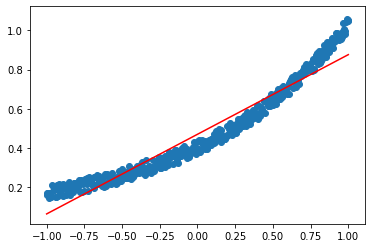

In [13]:
# Plot Results
plt.scatter(data.x, data.y)
plt.plot(data.x, model.W * data.x + model.b, 'r')
plt.show()